![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# GFPGAN Inference Demo (Paper Model)


[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2101.04061)
[![GitHub Stars](https://img.shields.io/github/stars/TencentARC/GFPGAN?style=social)](https://github.com/TencentARC/GFPGAN)
[![download](https://img.shields.io/github/downloads/TencentARC/GFPGAN/total.svg)](https://github.com/TencentARC/GFPGAN/releases)

## GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>
It leverages the generative face prior in a pre-trained GAN (*e.g.*, StyleGAN2) to restore realistic faces while precerving fidelity. <br>

You may want to try an **imporoved** model without colorization. (It also does not require CUDA extensions). Please go to this [Colab Demo](https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo) for GFPGAN <a href="https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>.

**Limitations**: GFPGAN could not handle all the low-quality faces in the real world. Therefore, it may fail on your own cases.

###Enjoy! :-)

<img src="https://xinntao.github.io/projects/GFPGAN_src/gfpgan_teaser.jpg" width="800">

# Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# Set BASICSR_EXT=True to compile the cuda extensions in the BasicSR - It may take several minutes to compile, please be patient.
!BASICSR_EXT=True pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.1.0/GFPGANv1.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 523 (delta 168), reused 153 (delta 153), pack-reused 313
Receiving objects: 100% (523/523), 5.37 MiB | 24.79 MiB/s, done.
Resolving deltas: 100% (279/279), done.
/content/GFPGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.6 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-cp310-cp310-linux_x86_64.whl size=9714025 sha256=ebf1e04fcfc2f4e3bb16311dc5aa71226bbee3e19572635ba9282595f6d74fa8
  Stored in directory: /r

# Inference cropped face images

We first look at the cropped low-quality faces.<br>
Some examples are in the <inputs/cropped_faces> folder.

(-0.5, 511.5, 511.5, -0.5)

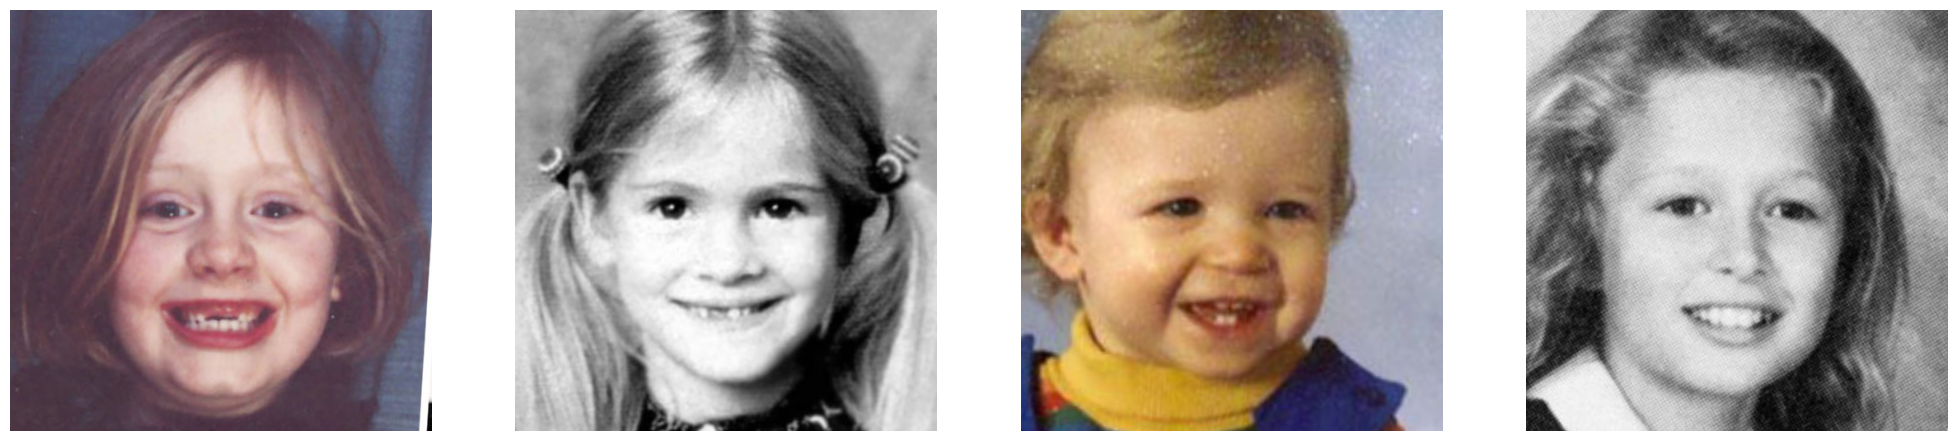

In [ ]:
# visulize the cropped low-quality faces
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('inputs/cropped_faces/Adele_crop.png')
img2 = imread('inputs/cropped_faces/Julia_Roberts_crop.png')
img3 = imread('inputs/cropped_faces/Justin_Timberlake_crop.png')
img4 = imread('inputs/cropped_faces/Paris_Hilton_crop.png')

# show images
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(img2)
ax2.axis('off')
ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(img3)
ax3.axis('off')
ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(img4)
ax4.axis('off')

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# The meanings of each argument:
# --model_path: the path to the pre-trained GFPGAN model
# --test_path: the folder path to the low-quality images
# --aligned: whether the input images are aligned
!python inference_gfpgan.py -i inputs/cropped_faces -o results -v 1.3 -s 2 --bg_upsampler realesrgan

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth" to /usr/local/lib/python3.10/dist-packages/weights/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:00<00:00, 299MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the fu

In [ ]:
# Now, let us to look at the reuslts! :-)
# The results are in the <resutls> folder
!ls results

cmp  cropped_faces  restored_faces  restored_imgs


(-0.5, 1023.5, 511.5, -0.5)

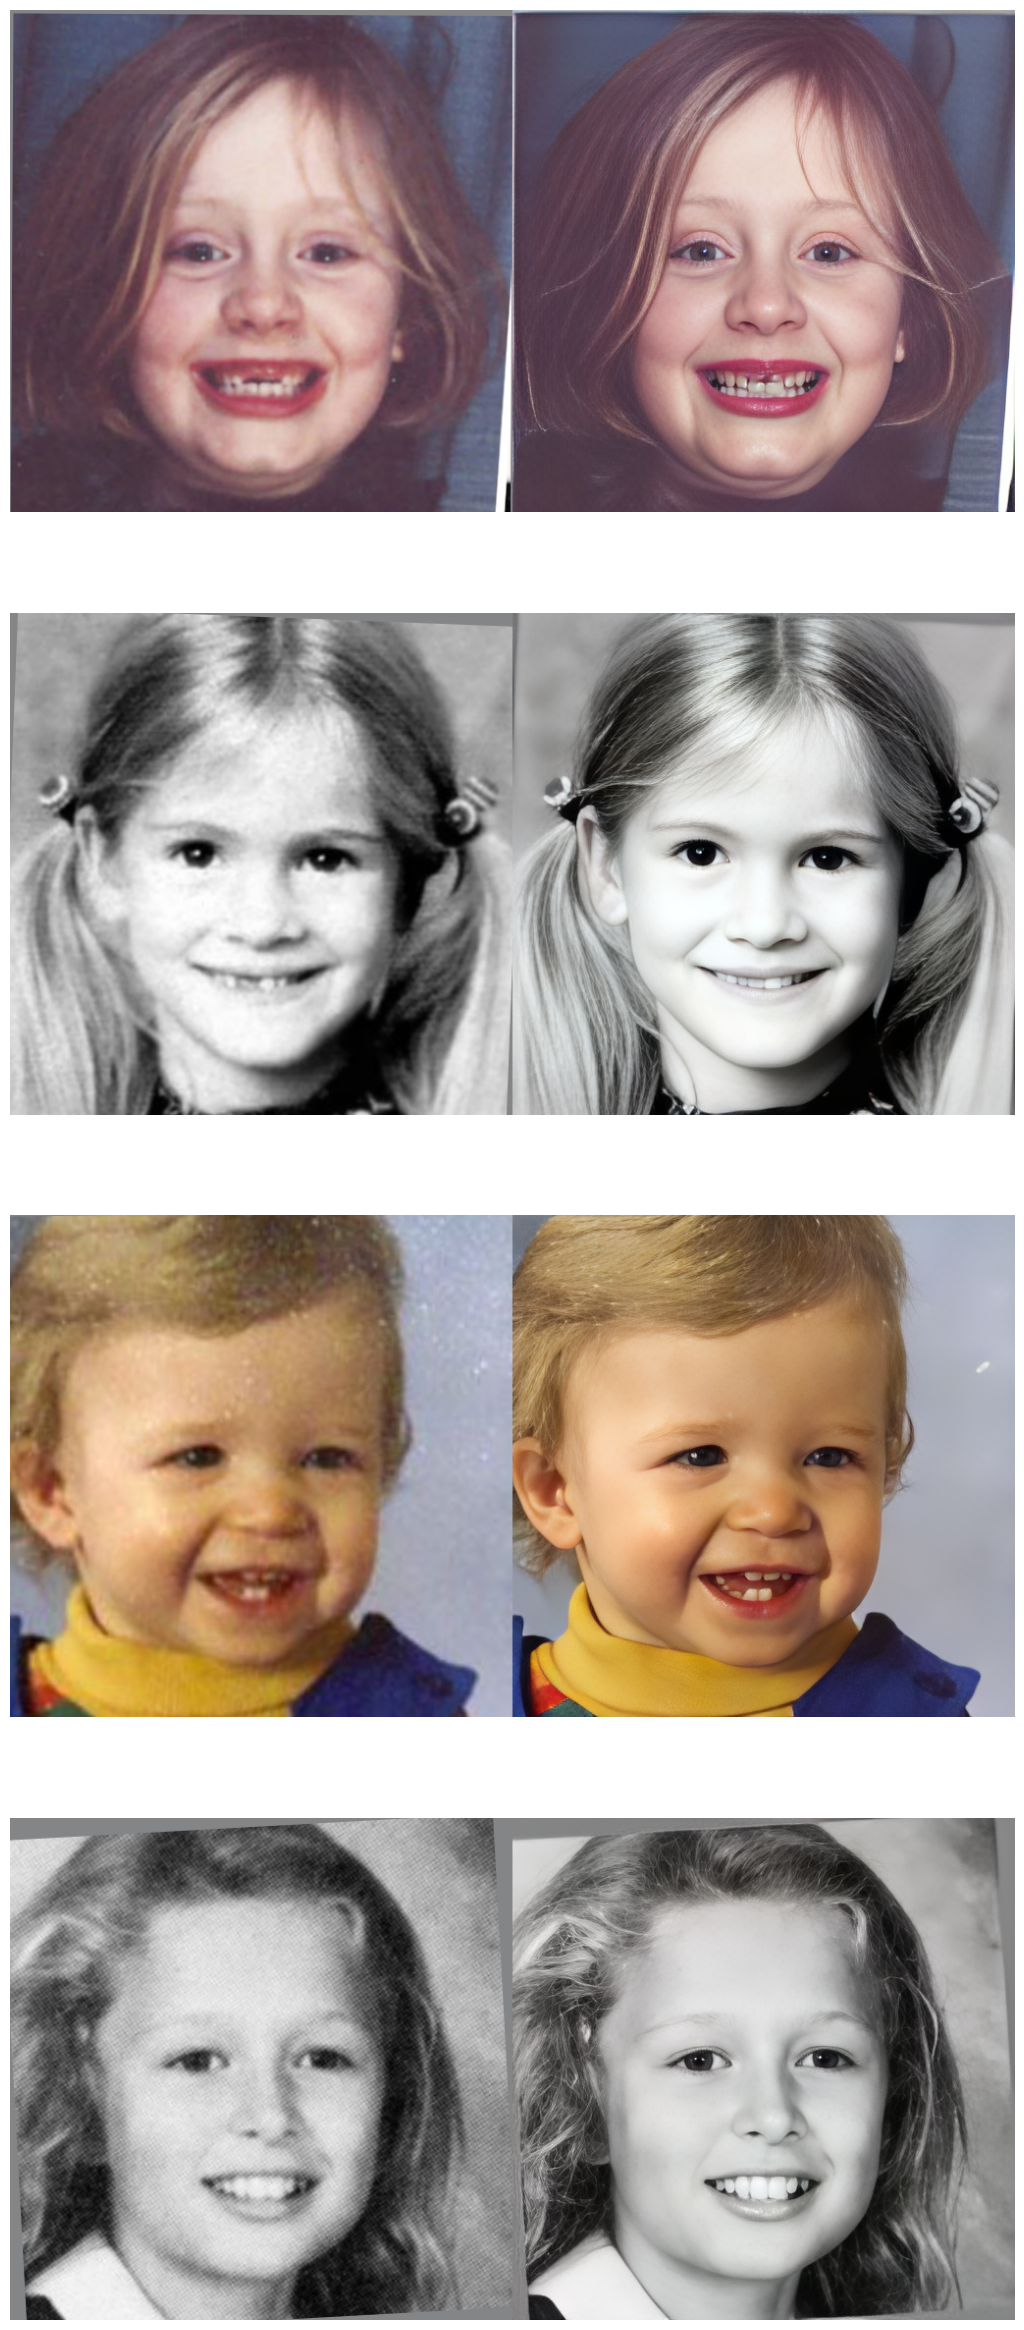

In [ ]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('results/cmp/Adele_crop_00.png')
img2 = imread('results/cmp/Julia_Roberts_crop_00.png')
img3 = imread('results/cmp/Justin_Timberlake_crop_00.png')
img4 = imread('results/cmp/Paris_Hilton_crop_00.png')

# show images
fig = plt.figure(figsize=(15, 30))
ax1 = fig.add_subplot(4, 1, 1)
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(4, 1, 2)
ax2.imshow(img2)
ax2.axis('off')
ax3 = fig.add_subplot(4, 1, 3)
ax3.imshow(img3)
ax3.axis('off')
ax4 = fig.add_subplot(4, 1, 4)
ax4.imshow(img4)
ax4.axis('off')

We can see that:
Not only the **facial details**, but also the **colors** are enhanced by the GFPGAN model.